In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import lsqlin
from scipy import stats
import copy 
from sklearn import svm
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, log_loss, classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn import metrics 

import sklearn.model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
vix_df = pd.read_excel( 'VIXfutures_20080414_20201231.xlsx' )

vix_df = vix_df.sort_values( by = ['Date'], ascending = True )

x_df = vix_df[ [ 'Date', 'VIX', 'w', \
                       'CMF30', 'CMF60', 'CMF90', 'CMF120', 'CMF150', \
                       'roll30', 'roll60', 'roll90', 'roll120', 'roll150', \
                       'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9' ] ]

# for eache row, if it contains a non-number element in a column, then drop the entire row
x_df = x_df.dropna()

# for eache row, if it contains a 0 element in a column, then drop the entire row
#x_df = x_df.loc[ ( x_df != 0 ).all( axis = 1 ) ]

# reset the index
x_df= x_df.reset_index( drop = True )

dates = x_df[ 'Date' ]

In [3]:
vix = x_df.VIX 
T = len(vix)

v_1 = x_df.CMF30 
v_2 = x_df.CMF60 
v_3 = x_df.CMF90 
v_4 = x_df.CMF120 
v_5 = x_df.CMF150 

d_theta_log_v_1 = x_df.roll30 
d_theta_log_v_2 = x_df.roll60 
d_theta_log_v_3 = x_df.roll90 
d_theta_log_v_4 = x_df.roll120 
d_theta_log_v_5 = x_df.roll150 

In [4]:
vix_etn_number = 10
x_row = vix_etn_number + 1  #  plus 1 here is for the VIX
x_column = len( v_1 );
X = np.ones( ( x_row, x_column ) )

X[ 0, : ] =  np.log( vix )

X[ 1, : ] =  np.log( v_1 )
X[ 2, : ] =  np.log( v_2 )
X[ 3, : ] =  np.log( v_3 )
X[ 4, : ] =  np.log( v_4 )
X[ 5, : ] =  np.log( v_5 )

X[ 6, : ] = d_theta_log_v_1
X[ 7, : ] = d_theta_log_v_2
X[ 8, : ] = d_theta_log_v_3
X[ 9, : ] = d_theta_log_v_4
X[ 10, : ] = d_theta_log_v_5

In [5]:
#######################################################
####
#### 1-month and 5-month rolling futures portfolios
####
#######################################################

dt = 1/252;
r = .03
vxx = np.zeros(T)
vxz = np.zeros(T)
vxx[0]=100
vxz[0]=100
for t in range(T-1):
    vxx[t+1] = vxx[t]*(1+r*dt + X[ 6, t+1 ]*dt  + (X[ 1, t+1 ]-X[ 1, t ])/X[ 1, t ]  )
    vxz[t+1] = vxz[t]*(1+r*dt + X[ 10, t+1 ]*dt  + (X[ 5, t+1 ]-X[ 5, t ])/X[ 5, t ]  )
    
r_trade = np.zeros((T-1,5))
r_trade[:,0] = np.ones(T-1)*r*dt
r_trade[:,1] = -np.diff(vxx)/vxx[:-1] + 2*np.diff(vxz)/vxz[:-1]
r_trade[:,2] = -np.diff(vxx)/vxx[:-1] + np.diff(vxz)/vxz[:-1]+r*dt
r_trade[:,3] = np.diff(vxx)/vxx[:-1] - 2*np.diff(vxz)/vxz[:-1]
r_trade[:,4] = np.diff(vxx)/vxx[:-1] - np.diff(vxz)/vxz[:-1]+r*dt

y = np.argmax(r_trade,axis=1) ### index of max return, to be predicted by classifier



K-Folds Cross Validation:  0
Total Data Size:  3201
Training Fold Size:  2880
Training Dates:  2009-07-24 00:00:00  to  2020-12-30 00:00:00
Testing Dates:  2008-04-16 00:00:00  to  2009-07-23 00:00:00
Testing Fold Size:  321


profit (percentage annualized): 84.0774
Sharpe ratio: 4.0541


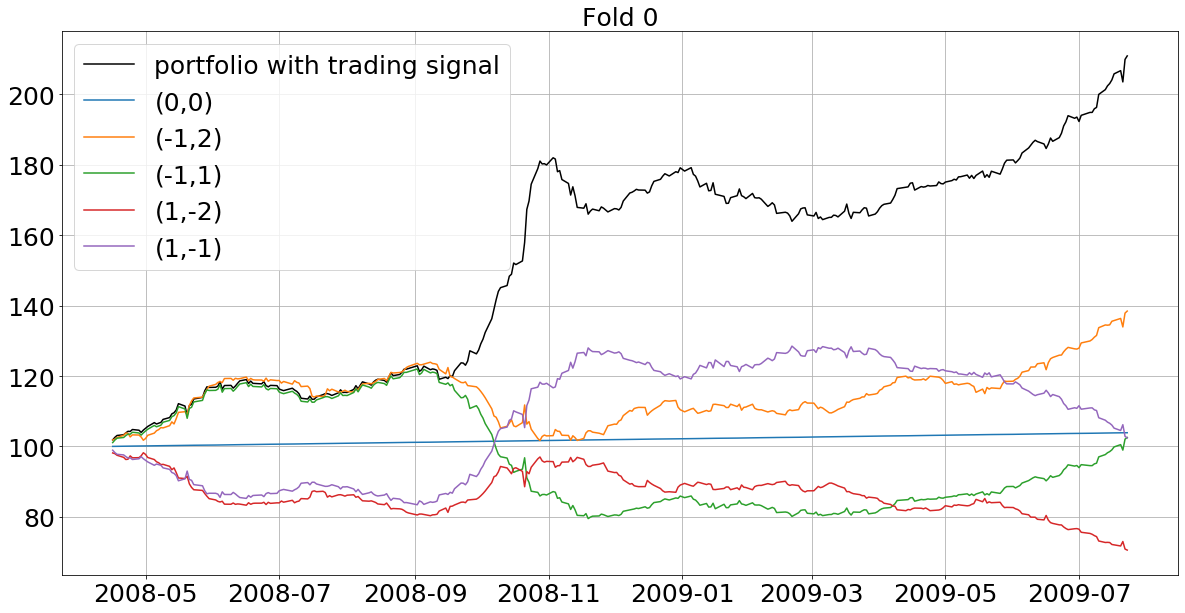



K-Folds Cross Validation:  1
Total Data Size:  3201
Training Fold Size:  2881
Training Dates:  2008-04-16 00:00:00  to  2020-12-30 00:00:00
Testing Dates:  2009-07-24 00:00:00  to  2010-10-28 00:00:00
Testing Fold Size:  320


profit (percentage annualized): 193.4335
Sharpe ratio: 6.4565


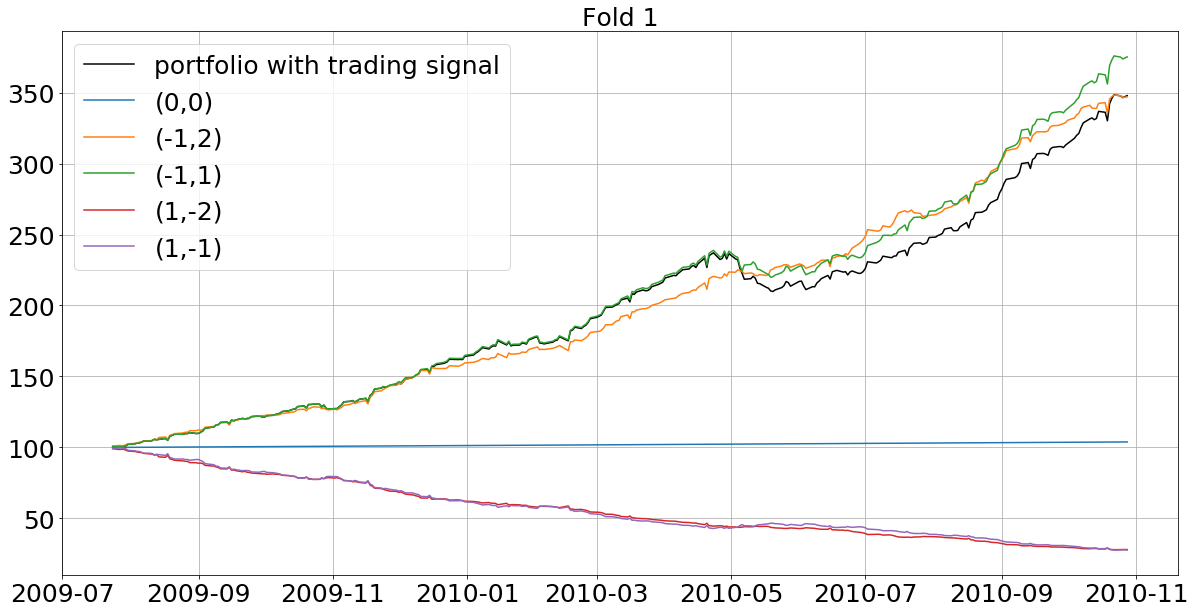



K-Folds Cross Validation:  2
Total Data Size:  3201
Training Fold Size:  2881
Training Dates:  2008-04-16 00:00:00  to  2020-12-30 00:00:00
Testing Dates:  2010-10-29 00:00:00  to  2012-02-06 00:00:00
Testing Fold Size:  320


profit (percentage annualized): 108.7488
Sharpe ratio: 4.0184


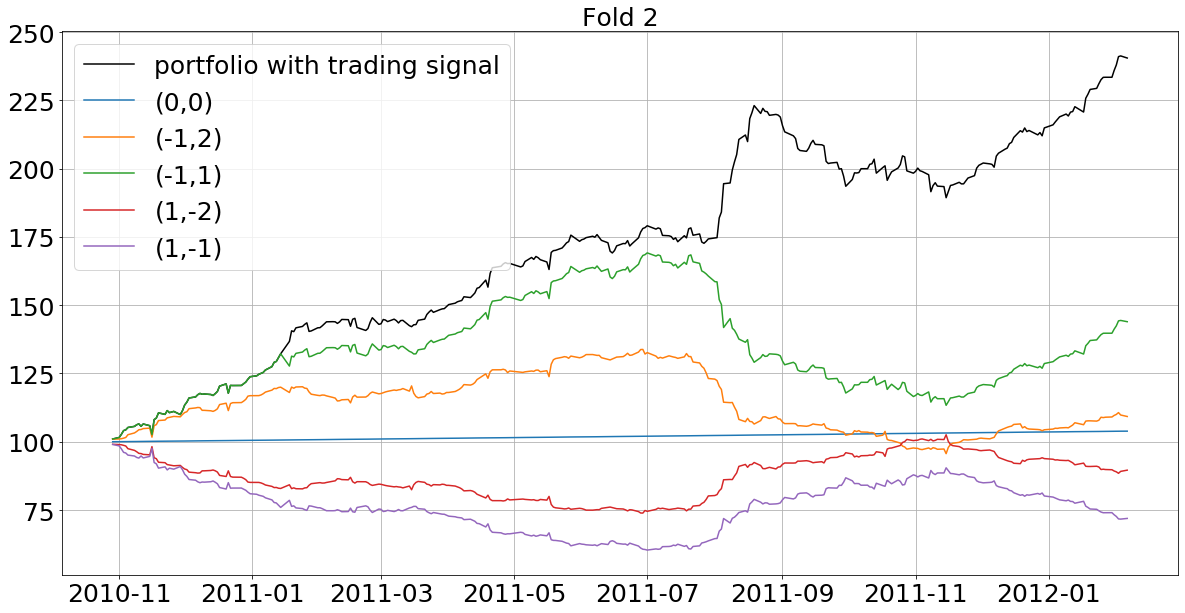



K-Folds Cross Validation:  3
Total Data Size:  3201
Training Fold Size:  2881
Training Dates:  2008-04-16 00:00:00  to  2020-12-30 00:00:00
Testing Dates:  2012-02-07 00:00:00  to  2013-05-16 00:00:00
Testing Fold Size:  320


profit (percentage annualized): 56.2758
Sharpe ratio: 2.1762


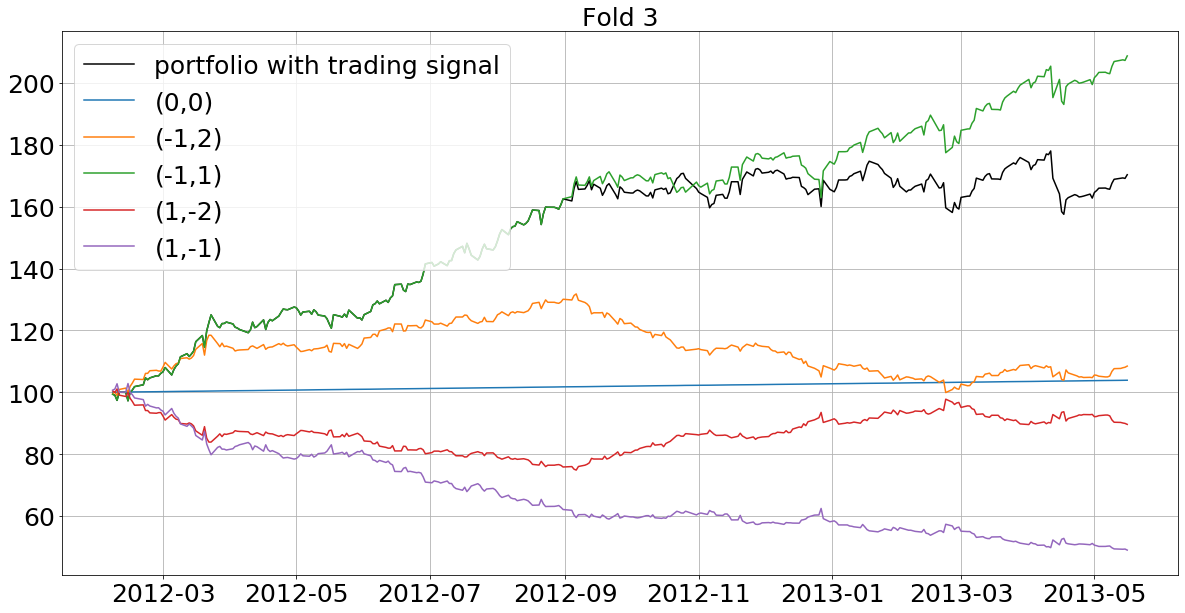



K-Folds Cross Validation:  4
Total Data Size:  3201
Training Fold Size:  2881
Training Dates:  2008-04-16 00:00:00  to  2020-12-30 00:00:00
Testing Dates:  2013-05-17 00:00:00  to  2014-08-22 00:00:00
Testing Fold Size:  320


profit (percentage annualized): 37.6684
Sharpe ratio: 2.3578


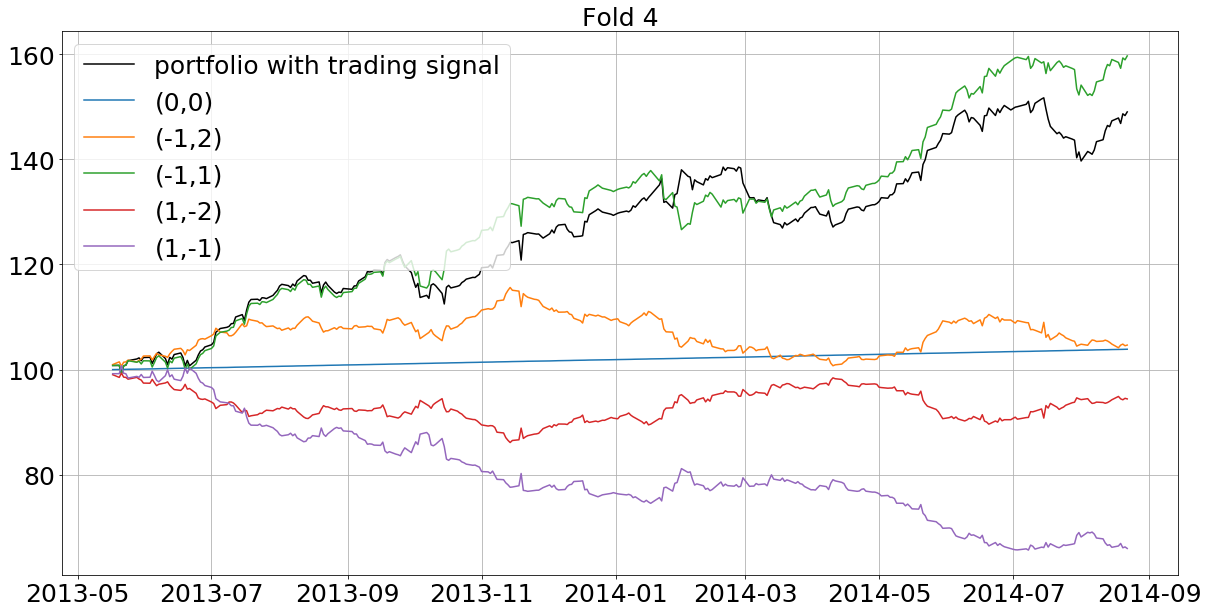



K-Folds Cross Validation:  5
Total Data Size:  3201
Training Fold Size:  2881
Training Dates:  2008-04-16 00:00:00  to  2020-12-30 00:00:00
Testing Dates:  2014-08-25 00:00:00  to  2015-11-30 00:00:00
Testing Fold Size:  320


profit (percentage annualized): 56.6558
Sharpe ratio: 2.6501


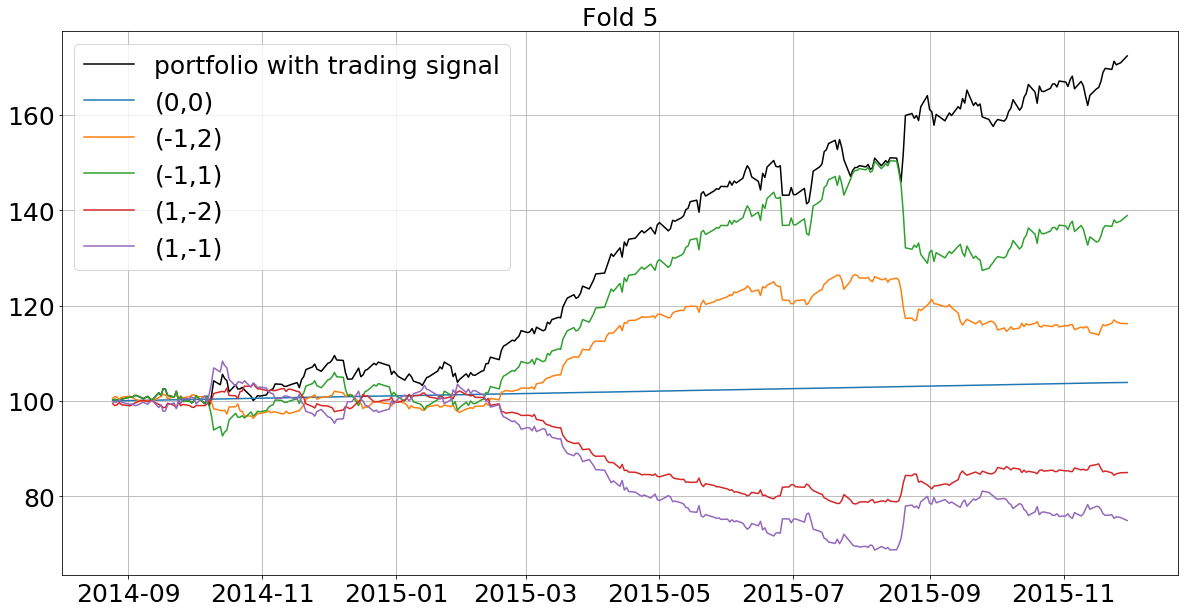



K-Folds Cross Validation:  6
Total Data Size:  3201
Training Fold Size:  2881
Training Dates:  2008-04-16 00:00:00  to  2020-12-30 00:00:00
Testing Dates:  2015-12-01 00:00:00  to  2017-03-09 00:00:00
Testing Fold Size:  320


profit (percentage annualized): 120.6543
Sharpe ratio: 3.9689


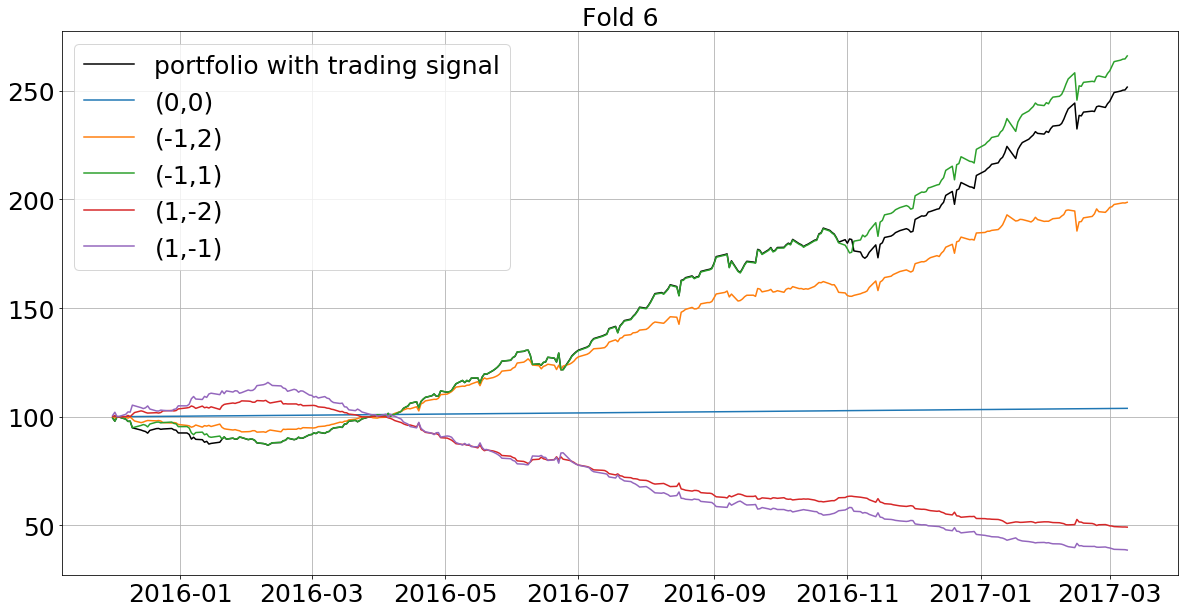



K-Folds Cross Validation:  7
Total Data Size:  3201
Training Fold Size:  2881
Training Dates:  2008-04-16 00:00:00  to  2020-12-30 00:00:00
Testing Dates:  2017-03-10 00:00:00  to  2018-06-15 00:00:00
Testing Fold Size:  320


profit (percentage annualized): 35.1751
Sharpe ratio: 1.2858


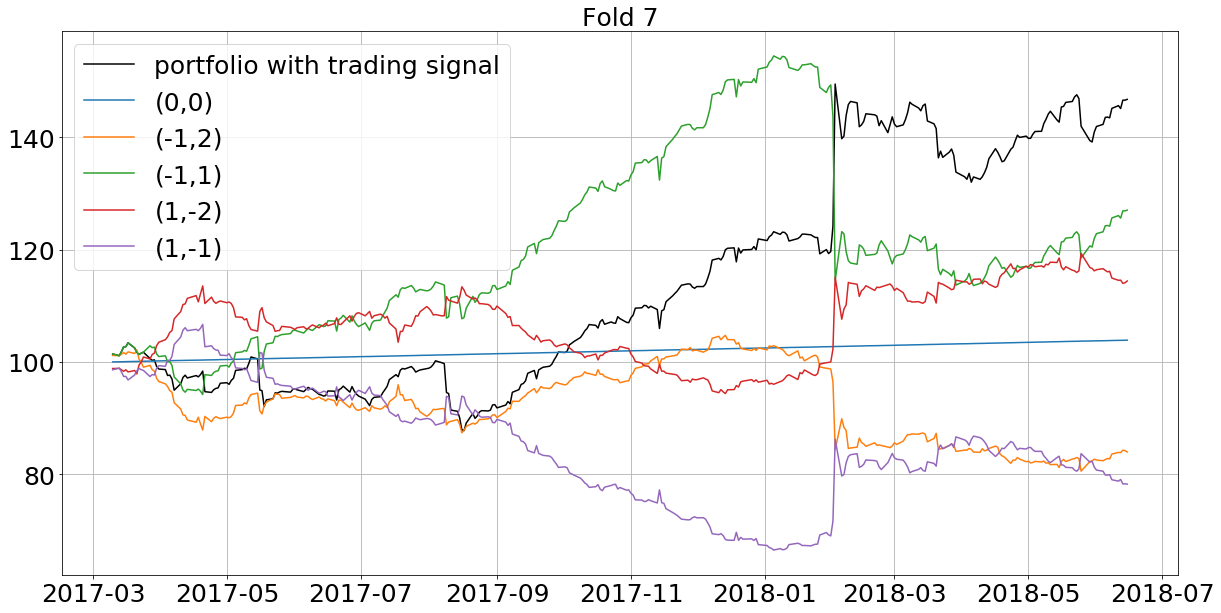



K-Folds Cross Validation:  8
Total Data Size:  3201
Training Fold Size:  2881
Training Dates:  2008-04-16 00:00:00  to  2020-12-30 00:00:00
Testing Dates:  2018-06-18 00:00:00  to  2019-09-24 00:00:00
Testing Fold Size:  320


profit (percentage annualized): 40.4702
Sharpe ratio: 2.1513


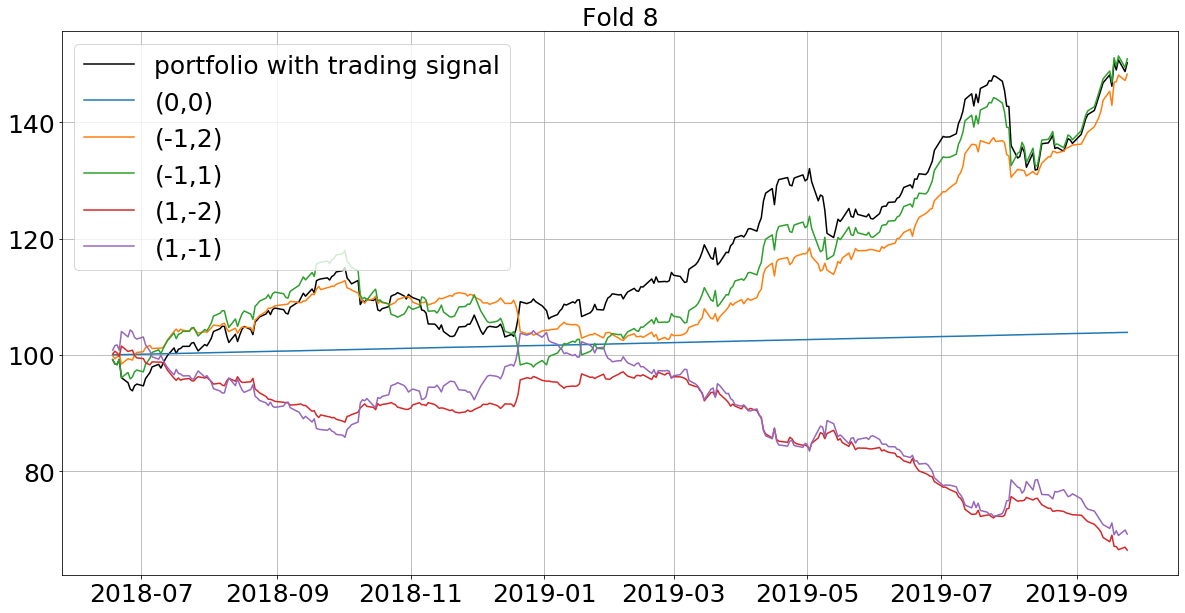



K-Folds Cross Validation:  9
Total Data Size:  3201
Training Fold Size:  2881
Training Dates:  2008-04-16 00:00:00  to  2019-09-24 00:00:00
Testing Dates:  2019-09-25 00:00:00  to  2020-12-30 00:00:00
Testing Fold Size:  320


profit (percentage annualized): 183.6009
Sharpe ratio: 4.9845


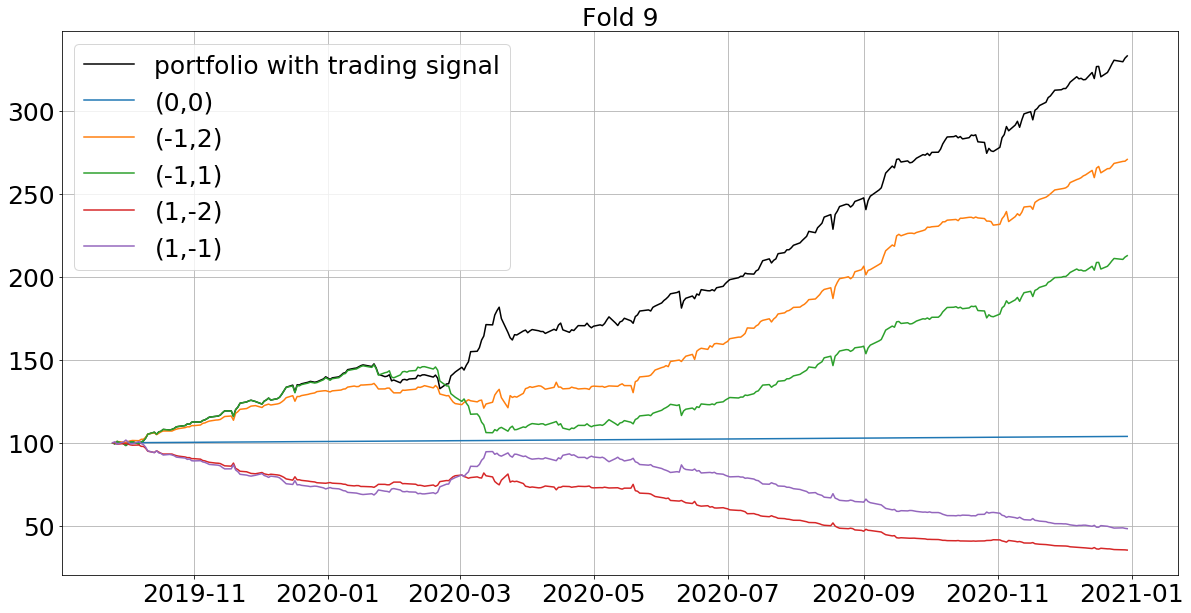

In [28]:
#######################################################
####
#### run a Logistic regression on k testing folds
####
#######################################################

fold_number = 10
k_folds = sklearn.model_selection.KFold( n_splits = fold_number ) 
k = int( 0 )

total_data_size = X.shape[ 1 ] - 1


for train_index, test_index in k_folds.split( X[:,0:-1].T ):
    
    print( '\n' )
    print( 'K-Folds Cross Validation: ', k )
    print( 'Total Data Size: ', total_data_size )
    print( 'Training Fold Size: ', train_index.shape[ 0 ] )
    print( 'Training Dates: ', dates.iloc[ train_index[ 0 ] ], ' to ', dates.iloc[ train_index[ -1 ] ] )
    print( 'Testing Dates: ', dates.iloc[ test_index[ 0 ] ], ' to ', dates.iloc[ test_index[ -1 ] ] )
    print( 'Testing Fold Size: ', test_index.shape[ 0 ] )
    print( '\n' )

    classifier = LogisticRegression(multi_class='multinomial',max_iter =  1000)
    classifier.fit(X[:,train_index].T,y[train_index])

    y_score = classifier.predict(X[:,test_index].T)
    my_predict = classifier.predict(X[:,test_index].T).ravel()
    

    r_my_trade = r_trade[test_index,my_predict]
    p_my_trade = 100*np.exp(np.cumsum(np.log(1+r_my_trade)))
    p_trade = 100*np.exp(np.cumsum(np.log(1+r_trade[test_index,:]),axis=0))

    my_mu = np.mean(np.diff(p_my_trade)/p_my_trade[0:-1])/dt
    my_vol = np.std(np.diff(p_my_trade)/p_my_trade[0:-1])/np.sqrt(dt)

    
    profit = (100*(p_my_trade[-1]-p_my_trade[0])/p_my_trade[0])/(len(test_index)*dt)
    SR = my_mu/my_vol
    
    #print(classification_report(y[test_index], my_predict, classifier.classes_))
    
    print("profit (percentage annualized): %.4f" %profit)
    print("Sharpe ratio: %.4f"%SR)

    plt.figure( figsize = ( 20, 10 ) )
    plt.plot(dates[test_index],p_my_trade,'k', label="portfolio with trading signal");
    labels = ["(0,0)","(-1,2)","(-1,1)","(1,-2)","(1,-1)"]
    for i in range(5):
        plt.plot(dates[test_index],p_trade[:,i], label=labels[i]);
    plt.title('Fold '+str(k), fontsize = 25 )
    plt.xticks( fontsize = 25 );
    plt.yticks( fontsize = 25 )
    plt.legend(loc="upper left",fontsize = 25)
    plt.grid( which = 'major' )
    plt.grid( which = 'minor', linestyle = ':' )
    plt.show()
    
    k = k+1